In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/self-driving-cars/labels_train.csv
/kaggle/input/self-driving-cars/labels_trainval.csv
/kaggle/input/self-driving-cars/labels_val.csv
/kaggle/input/self-driving-cars/images/1479498457448232030.jpg
/kaggle/input/self-driving-cars/images/1478020894712588023.jpg
/kaggle/input/self-driving-cars/images/1479502069714972898.jpg
/kaggle/input/self-driving-cars/images/1478899347777707565.jpg
/kaggle/input/self-driving-cars/images/1479500482587459937.jpg
/kaggle/input/self-driving-cars/images/1478732638089007825.jpg
/kaggle/input/self-driving-cars/images/1479498594981336285.jpg
/kaggle/input/self-driving-cars/images/1478897449382202627.jpg
/kaggle/input/self-driving-cars/images/1478020841719652984.jpg
/kaggle/input/self-driving-cars/images/1479501472176216081.jpg
/kaggle/input/self-driving-cars/images/1479501825699578212.jpg
/kaggle/input/self-driving-cars/images/1479504363872203561.jpg
/kaggle/input/self-driving-cars/images/1479505311435596750.jpg
/kaggle/input/self-driving-cars/i

In [11]:
import numpy as np
import PIL
import os
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
import ultralytics
from ultralytics import YOLO 

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [14]:
yolo_model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 53.9MB/s]


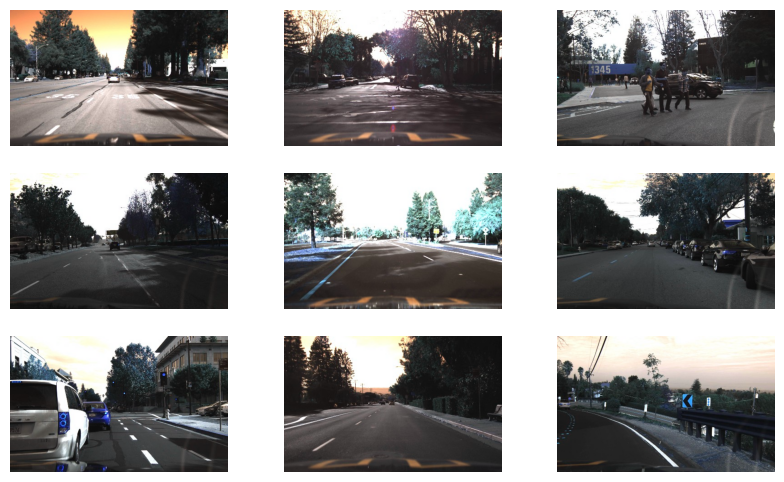

In [26]:
root_path = '/kaggle/input/self-driving-cars/images/*'
samples = 9
img_data = glob(root_path)
random_img = random.sample(img_data, samples)

plt.figure(figsize=(10,6))
for i in range(samples):
    plt.subplot(3,3,i+1)
    plt.imshow(cv2.imread(random_img[i]))
    plt.axis('off')

In [29]:
images = []
for i in range(samples):
    yolo_outputs = yolo_model.predict(random_img[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names

    for j in range(len(box)):
        
        labels = names[box.cls[j].item()]
        codi = box.xyxy[j].tolist()
        conf = np.round(box.conf[j].item(), 2)
        
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {codi}')
        print(f'Confidence is: {conf}')
        print('***************************************')

    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])


image 1/1 /kaggle/input/self-driving-cars/images/1479500181087352946.jpg: 416x640 4 cars, 625.1ms
Speed: 2.2ms preprocess, 625.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)
Object 1 is: car
Coordinates are: [215.37057495117188, 140.18685913085938, 242.1727294921875, 160.96905517578125]
Confidence is: 0.84
***************************************
Object 2 is: car
Coordinates are: [97.19815063476562, 143.6956024169922, 117.68275451660156, 154.5694580078125]
Confidence is: 0.77
***************************************
Object 3 is: car
Coordinates are: [30.523624420166016, 144.36114501953125, 62.4840202331543, 159.8967742919922]
Confidence is: 0.72
***************************************
Object 4 is: car
Coordinates are: [240.05123901367188, 142.0740203857422, 248.3911895751953, 149.39247131347656]
Confidence is: 0.5
***************************************

image 1/1 /kaggle/input/self-driving-cars/images/1479505301433015902.jpg: 416x640 7 cars, 745.0ms
Speed: 2.8ms p

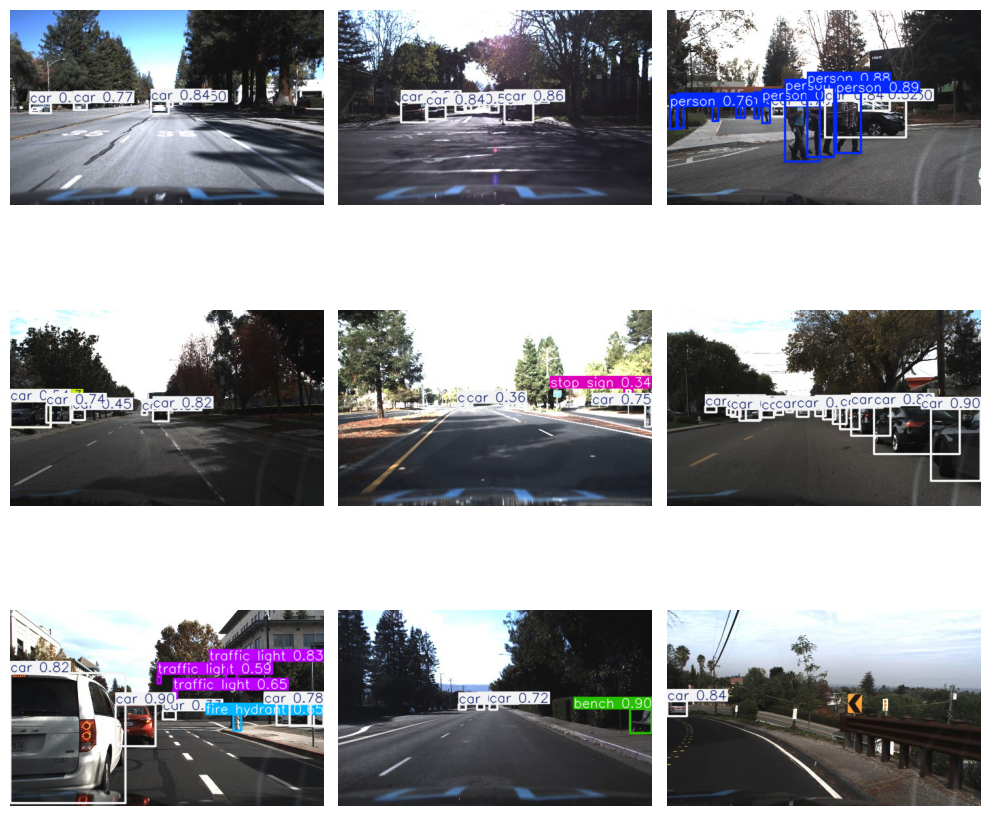

In [33]:
plt.figure(figsize=(10,10))
for i, img in enumerate(images):
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [49]:
def ODImage(image) :
    
  yolo_outputs = yolo_model.predict(image)
  output = yolo_outputs[0]
  box = output.boxes
  names = output.names
      
  NewImage = output.plot()[:, :, ::-1]
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.imshow(cv2.cvtColor(cv2.imread(image, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))
  plt.title('Original Image')
    
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(NewImage)
  plt.axis('off')
  plt.title('OD Image')
  plt.show()


image 1/1 /kaggle/input/self-driving-cars/images/1479499631049534600.jpg: 416x640 3 cars, 3 traffic lights, 603.3ms
Speed: 2.4ms preprocess, 603.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


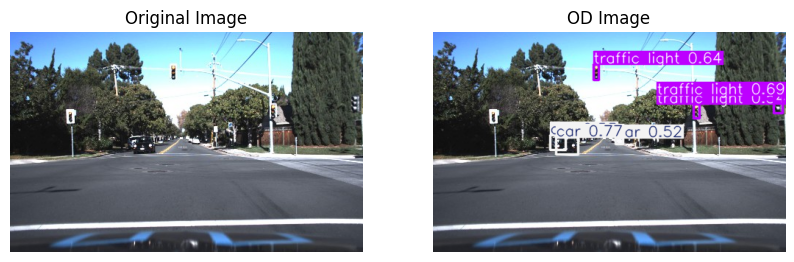


image 1/1 /kaggle/input/self-driving-cars/images/1478732495865983003.jpg: 416x640 3 cars, 3 traffic lights, 605.6ms
Speed: 2.9ms preprocess, 605.6ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


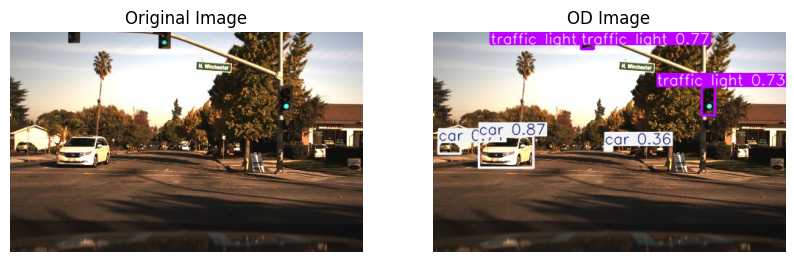

In [50]:
ODImage('/kaggle/input/self-driving-cars/images/1479499631049534600.jpg')
ODImage('/kaggle/input/self-driving-cars/images/1478732495865983003.jpg')


image 1/1 /kaggle/input/self-driving-cars/images/1478900439512638631.jpg: 416x640 6 cars, 617.6ms
Speed: 2.2ms preprocess, 617.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


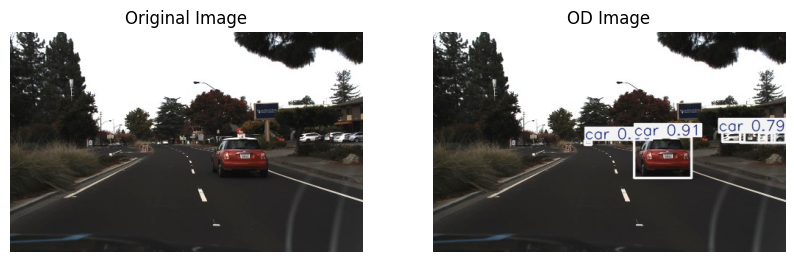

In [52]:
Path = '/kaggle/input/self-driving-cars/images'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))